###### <center>Quantium Virtual Internship</center>
## <center> Task1:Data Preparation and Customer Analytics </center>
### Objective: 

Conduct analysis on client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

### Specific Objectives:
- Identify the metrics that would be used to describe the customers’ purchasing behaviour.
- To analyse the data to understand customer segments and their chip purchasing behaviour
- To present a strategic recommendation to Julia that is supported by data  which she can then use for the upcoming category review. 


### 1. Loading data

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the data
purchase_data = pd.read_csv('D:/sqldatasets/Foragedatasets/QVI_purchase_behaviour.csv')
transaction_data = pd.read_excel('D:/sqldatasets/Foragedatasets/QVI_transaction_data.xlsx')


In [3]:
#reading the first 5 rows of each data
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### 2. Data Wrangling

### Idenfying the datatypes 

In [5]:
#checking the datatype contained in each of the columns
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### Identifying missing values 

In [6]:
#checking the datatype found in each column
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
#checking for missing values 
transaction_data.isna().sum()


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
purchase_data.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

It could be observed that both the customer behaviour and transaction datasets do not have missing values.

### Outliers identification and removal

Text(0, 0.5, 'Total sales')

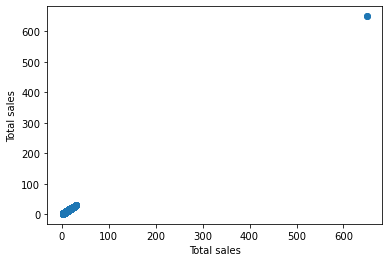

In [9]:
plt.scatter(transaction_data['TOT_SALES'],transaction_data['TOT_SALES'])
plt.xlabel('Total sales')
plt.ylabel('Total sales')

- The transaction dataset seems to contain a few outliers based on the total sales.
- Also most total sales are concerntrated between 0 and 30.

In [10]:
#Displaying the rows containing outliers
transaction_data[transaction_data['TOT_SALES']>30]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [11]:
#Checking number of transaction carried out by  customer 226000.
transaction_data[transaction_data['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


- Before droping the outliers,it is good to find out the number of transactions carried out by customer 226000.From the table above it shows that from 2018 - 2019, this customer has bought chips just twice.Therefore he is not a loyal customer and should not be targeted.

### Serial date to date conversion
- It could be observed that the DATE column is of Serial or Excel format.

In [12]:
import datetime as dt

In [13]:
Dat = []
for dat in transaction_data['DATE']:
    date = dt.datetime(1899, 12, 30) + dt.timedelta(days=dat)
    Dat.append(date)
transaction_data['DATE'] = Dat

In [14]:
#Checking the date column
transaction_data['DATE'][:2]

0   2018-10-17
1   2019-05-14
Name: DATE, dtype: datetime64[ns]

##### Checking PROD_NAME
- The aim is to find out if it contains some special characters such as %,@,#,^<.

In [15]:
print(transaction_data['PROD_NAME'])

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object


Now, both datasets seem to be fairly clean.

### Merging the datasets
- The merging will be performed using the foreign key LYLTY_CARD_NBR.

In [16]:
#Merging the dataset
clean_data = transaction_data.merge(purchase_data,on = 'LYLTY_CARD_NBR',how = 'right')

In [17]:
clean_data.sort_values(by='DATE').head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
74566,2018-07-01,78,78115,76138,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,MIDAGE SINGLES/COUPLES,Mainstream
215061,2018-07-01,220,220035,219501,81,Pringles Original Crisps 134g,2,7.4,YOUNG SINGLES/COUPLES,Mainstream
139496,2018-07-01,141,141141,142377,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Mainstream
54692,2018-07-01,59,59307,55832,17,Kettle Sensations BBQ&Maple 150g,2,9.2,YOUNG SINGLES/COUPLES,Mainstream
34400,2018-07-01,39,39086,35147,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,OLDER SINGLES/COUPLES,Mainstream


In [18]:
#Droping the outliers
clean_data.drop([69762,69763],inplace = True)

### 3. Exploratory Data Analysis(EDA)

Now that the data has been cleaned, the next thing would be to look for interesting insights in the chip market to help recommend a business strategy.

To do so, some metrics we want to consider are:

- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

Some more information from the data team that we could ask for, to analyse with the chip information for more insight includes

- The customer’s total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips.
- Spending on other snacks, such as crackers and biscuits, to determine the preference and the purchase frequency of chips compared to other snacks
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips.

In [19]:
#1.Total number of records in the datasets
clean_data.shape

(264834, 10)

In [20]:
#2.Total number of customers
clean_data.LYLTY_CARD_NBR.nunique()

72637

In [21]:
#2.Identifying the categories of customers
clean_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

There categories of customers involved are;
- Premium,
- Mainstream and
- Budget

In [22]:
# 3.Distribution of customers within the segments
group_seg = clean_data.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].unique()
customer = []
for i in group_seg:
    customer.append(len(i))
    
pd.DataFrame({'Customer_segment':group_seg.index, 'No. of customers':customer})

,Customer_segment,No. of customers
0,Budget,24470
1,Mainstream,29245
2,Premium,18922


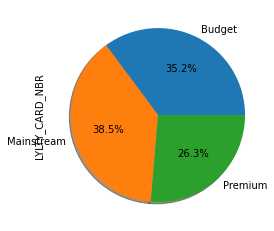

In [23]:
#4. Identifying the percetage of customers for each category 
group = clean_data.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].count()
group.plot(kind = 'pie',autopct = '%1.1f%%',shadow = True)
plt.savefig('custmersPerCategory.png')

- A greater percentage of customers,38.5% are from the Mainstream category followed by the Budget category with 35.2% and the Premium category with 26.3%.

In [24]:
#5. Distribution of sales accross the years
clean_data['Year'] = pd.to_datetime(clean_data['DATE']).dt.year
clean_data['Month'] = pd.to_datetime(clean_data['DATE']).dt.month
clean_data['Day'] = pd.to_datetime(clean_data['DATE']).dt.day
pd.DataFrame(clean_data.groupby(['Year','PREMIUM_CUSTOMER'])['TOT_SALES'].sum())

TOT_SALES
Year PREMIUM_CUSTOMER           
2018 Budget            341069.50
     Mainstream        379289.65
     Premium           256732.00
2019 Budget            335122.05
     Mainstream        371454.85
     Premium           250726.95

It could be observed that within the years 2018 and 2019,most of the sales were contributed by the Mainstream customer segment.

In [25]:
# 5. Distribution of total sales contributed by each segment
groupdata = clean_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
category_df = pd.DataFrame({'Category':groupdata.index,'Total_Sales':groupdata.values})
category_df

,Category,Total_Sales
0,Budget,676191.55
1,Mainstream,750744.50
2,Premium,507458.95


- Most of the  sales made are from Mainstream segment followed by Budget segment(category). That is 38.8%(750744.50),35.0%(676211.55) are made the Mainstream and Budget segment respectively.

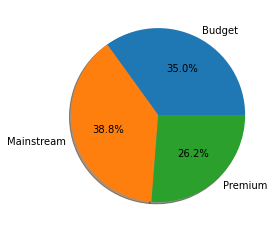

In [26]:
#Displaying the sales per customer segment on a pie chart
plt.pie(category_df['Total_Sales'],labels = category_df['Category'],autopct = '%1.1f%%',
       shadow = True)
plt.savefig('category_sales.png')

- A greater of percentage of the sales made are from the Mainstream customer category,followed by the Budget customer category.

In [27]:
# 6. Identifying the various LIFE STAGES within each costomer segment
clean_data.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

The unique attributes used to describe the customers include:
- YOUNG SINGLES/COUPLES,YOUNG FAMILIES,
- OLDER SINGLES/COUPLES,MIDAGE SINGLES/COUPLES,
- NEW FAMILIES,NEW FAMILIES,OLDER FAMILIES,RETIREES.


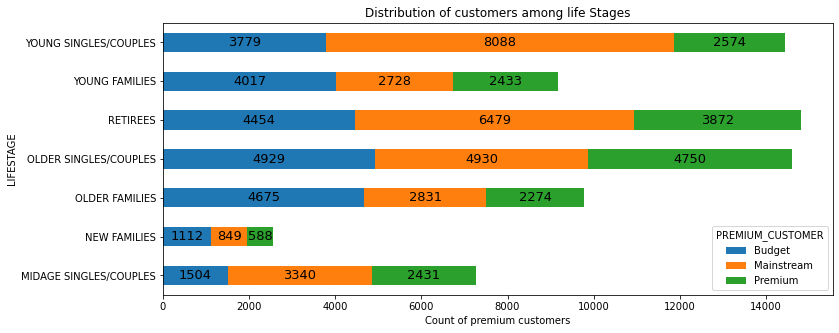

In [28]:
#7. Distribution of customer segments among the various life stages by customer segments
total_records = clean_data.groupby(['LIFESTAGE'])['PREMIUM_CUSTOMER'].value_counts().values.sum()
group2 = clean_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].agg('nunique').unstack('PREMIUM_CUSTOMER')
#percentages = group2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
ax = group2.plot(kind='barh', stacked=True, figsize=(12, 5))

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(width):.0f}' 
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=13)
plt.xlabel('Count of premium customers')
plt.title('Distribution of customers among life Stages')
plt.savefig('PremCustomerPerLifstage.png')
plt.show()

- From the visualization above the various customer categories seem to be uniformly distributed within OLDER SINGLES/COUPLES.
- Most of the customers buying chips are Retirees.These Retirees are mostly from the Mainstream segment.
- Mainstream- Young Singles/Couples and Mainstream-Retirees have high affinity for chips.This contributes to there being more sales to these segments but this is not a major driver for the Older families - budget segment.

In [29]:
#8.Distribution of total sales among different Life Stages
group_sales = clean_data.groupby(['LIFESTAGE'])['TOT_SALES'].agg(['sum','mean']).sort_values('sum',ascending = False)
pd.DataFrame(group_sales)

,sum,mean
LIFESTAGE,,
OLDER SINGLES/COUPLES,402406.75,7.386727
RETIREES,366470.90,7.364325
OLDER FAMILIES,353767.20,7.279760
YOUNG FAMILIES,316160.10,7.252709
YOUNG SINGLES/COUPLES,260405.30,7.158515
MIDAGE SINGLES/COUPLES,184751.30,7.357678
NEW FAMILIES,50433.45,7.289124


- Most of sales made are from the OLDER SINGLES/COUPLES followed by RETIREES and OLDER FAMILIES.
- The least sales were made from NEW FAMILIES.

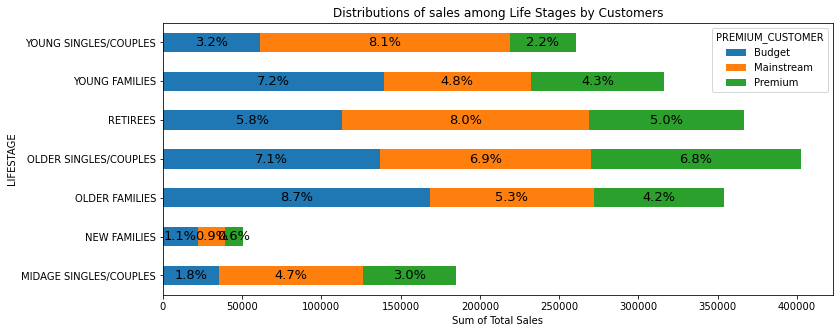

In [30]:
#9. Total sales per LIFESTAGE by customer segment
total_sales = clean_data['TOT_SALES'].sum()
sales_breakdown = clean_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index = False)['TOT_SALES'].agg(['sum','mean']).unstack('PREMIUM_CUSTOMER')
ax = sales_breakdown['sum'].plot(kind='barh', stacked=True, figsize=(12, 5))
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label = width / total_sales * 100
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(label):.1f}%' 
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=13)
        
plt.xlabel('Sum of Total Sales')
plt.title('Distributions of sales among Life Stages by Customers')
plt.savefig('SalesPerLifstage.png')

- It could be observed from above that most sales are made from Budget-Older Families,Budget- Older Single/couple,Mainstream-Retirees,Budget-Young Families and Mainstream-Youg Single/Couples.
- Most of the customers that spend more on chips within the Mainstream Segment are the Mainstream-Youg Single/Couples.

In [31]:
# 10. Percentage of sales gotten from each  LIFESTAGE by customer segment
sales_breakdown = clean_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
percentages = sales_breakdown.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percentages

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              19.223031
                        Mainstream          49.149235
                        Premium             31.627734
NEW FAMILIES            Budget              43.479972
                        Mainstream          33.735348
                        Premium             22.784680
OLDER FAMILIES          Budget              47.591538
                        Mainstream          29.241137
                        Premium             23.167326
OLDER SINGLES/COUPLES   Budget              33.982979
                        Mainstream          33.148997
                        Premium             32.868025
RETIREES                Budget              30.874975
                        Mainstream          42.480058
                        Premium             26.644967
YOUNG FAMILIES          Budget              44.074458
                        Mainstream          29.348659
                        Premium          

<Figure size 864x936 with 0 Axes>

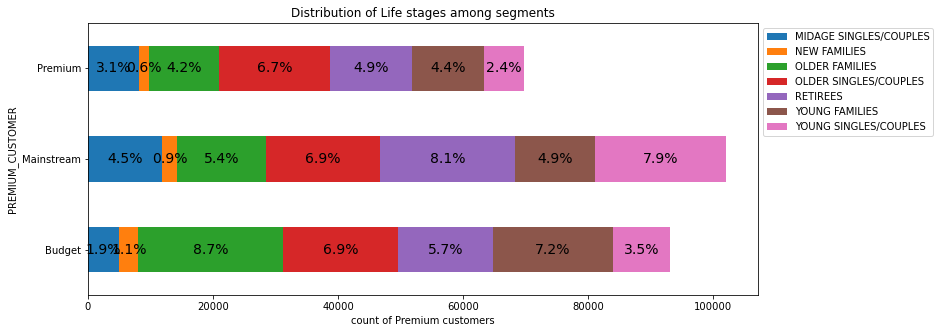

In [32]:
#11. Distribution of the different life stages among the various customer segments
grouped1 = clean_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['LYLTY_CARD_NBR'].count().unstack('LIFESTAGE')
# calculate the percentage of each category in feature1
#ercentages = grouped1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

plt.figure(figsize =(12,13))
# plot the stacked bar chart
ax = grouped1.plot(kind='barh', stacked=True,figsize=(12, 5))
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label = width / total_records * 100
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(label):.1f}%' 
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=14)
leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('count of Premium customers')
plt.title('Distribution of Life stages among segments')
plt.savefig('CategoryPerLifestage.png')

The above visualization is used to identify the types of persons to be targeted within each customer segment.Within the Mainstream segment the types of customers to be targeted are Older Singles/Couples,Retirees and Young Singles/Couples.For the Buget segment, the following types of persons should be targeted;Older Families,Older Singles/Couples and Young Families and within the Premium segment,Older Singles/Couples should be targeted.

In [33]:
#The percentage of each LIFESTAGE in each category of customers
grouped1 = clean_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['LIFESTAGE'].count()
percentages = grouped1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percentages

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES     5.388868
                  NEW FAMILIES               3.225806
                  OLDER FAMILIES            24.861789
                  OLDER SINGLES/COUPLES     19.757394
                  RETIREES                  16.317965
                  YOUNG FAMILIES            20.527079
                  YOUNG SINGLES/COUPLES      9.921099
Mainstream        MIDAGE SINGLES/COUPLES    11.642546
                  NEW FAMILIES               2.279680
                  OLDER FAMILIES            13.966349
                  OLDER SINGLES/COUPLES     17.960937
                  RETIREES                  21.047574
                  YOUNG FAMILIES            12.655410
                  YOUNG SINGLES/COUPLES     20.447504
Premium           MIDAGE SINGLES/COUPLES    11.789184
                  NEW FAMILIES               2.280065
                  OLDER FAMILIES            16.059462
                  OLDER SINGLES/COUPLES  

- Within the Mainstream category the following types of persons are highly concerntrated;RETIREES(21.05%),OLDER SINGLES/COUPLES(17.96%) and YOUNG SINGLES/COUPLES(20.45%).
- The Budget category is highly concerntrated with OLDER FAMILIES,YOUNG FAMILIES and OLDER SINGLES/COUPLES.

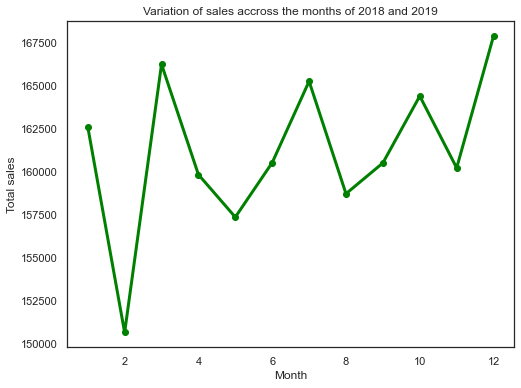

In [34]:
# 12 Variation of sales made accross the months in the years 2018 and 2019
plt.figure(figsize =(8,6))
sns.set(style="white")
clean_data.groupby('Month')['TOT_SALES'].sum().plot(kind = 'line',linewidth=3,color = 'green',marker = 'o')
plt.ylabel('Total sales')
plt.title('Variation of sales accross the months of 2018 and 2019')
plt.savefig('SalesVariation.png')

From the above visualization it could be observed that
- The least sales accross the years 2018 and 2019 were made in the month of February.
- Maximum sales accross the years 2018 and 2019 were made in the month of December.
- The variation of sum of sales accross the months of the years 2018 and 2019 seems to have as positive trend as there is an increase in total sales from the year 2018 to 2019.

In [35]:
# Generating a list of dates with transactions in ascending order 
date_counts = clean_data.groupby('DATE').size()

# Then compare to a full list of dates within the same range to find differences between them 
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(date_counts.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [36]:
len(date_counts)

364

Transactions were made in all the other days of the years except on Christmass day 25-12-2018. It it is the only date that is missing from the dataset. 

In [37]:
#Identify the customer segment with the highest frequency of buying
pd.DataFrame(clean_data.groupby('PREMIUM_CUSTOMER')['DATE'].count().sort_values(ascending = False))

,DATE
PREMIUM_CUSTOMER,
Mainstream,101988
Budget,93155
Premium,69691


- Interms of purchasing frequency, the category of customers frequently buying from the store is the Mainstream segment.

In [38]:
#For each LIFESTAGE identify the frequency proportion of each customer category
pd.DataFrame(clean_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['DATE'].count().sort_values(ascending = False))


DATE
LIFESTAGE              PREMIUM_CUSTOMER       
OLDER FAMILIES         Budget            23160
RETIREES               Mainstream        21466
YOUNG SINGLES/COUPLES  Mainstream        20854
YOUNG FAMILIES         Budget            19122
OLDER SINGLES/COUPLES  Budget            18405
                       Mainstream        18318
                       Premium           17754
RETIREES               Budget            15201
OLDER FAMILIES         Mainstream        14244
RETIREES               Premium           13096
YOUNG FAMILIES         Mainstream        12907
MIDAGE SINGLES/COUPLES Mainstream        11874
YOUNG FAMILIES         Premium           11563
OLDER FAMILIES         Premium           11192
YOUNG SINGLES/COUPLES  Budget             9242
MIDAGE SINGLES/COUPLES Premium            8216
YOUNG SINGLES/COUPLES  Premium            6281
MIDAGE SINGLES/COUPLES Budget             5020
NEW FAMILIES           Budget             3005
                       Mainstream         2325
                       Premium            1589

In [39]:
# Identifying the product brand with the maximum number of sales
clean_data['PROD_BRAND'] = clean_data['PROD_NAME'].str.split().str[0]
clean_data['PROD_BRAND'].value_counts().sort_values(ascending = False)

Kettle        41286
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: PROD_BRAND, dtype: int64

It could be observed that Some of the brand names of the products were written in more than one way. For example Infuzions abbreviated as Infzns, Doritos and Dorito ,Grain and GrnWves, CCs and NCC,Smith and Smiths,Snbts and Sunbites, WW and Woolworths.

In [40]:
#Replacing brand names with full names
clean_data['PROD_BRAND'] = clean_data['PROD_BRAND'].replace('Doritos',
 'Dorito',regex = True).replace('GrnWves','GrainWaves').replace('Grain',
 'GrainWaves').replace('NCC','Natural Chip Co').replace('CCs','Natural Chip Co').replace('Infzns'
  ,'Infuzions').replace('Snbts','Sunbites').replace('WW','Woolworths').replace('Smiths',
    'Smith').replace('RRD','Red')

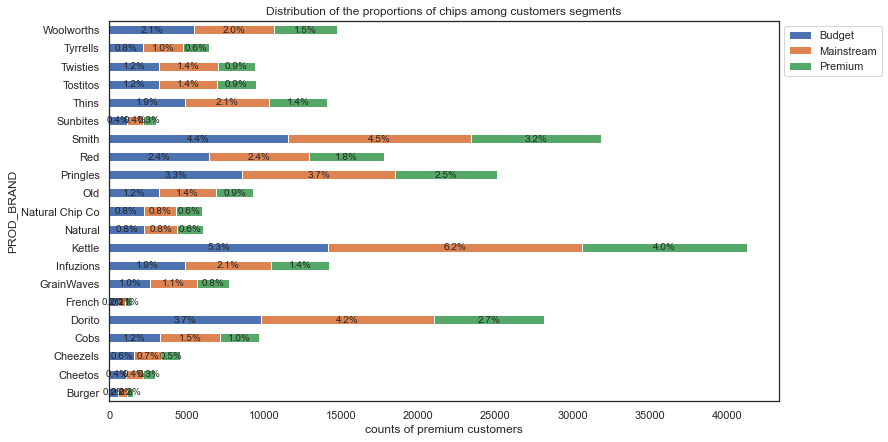

In [41]:
# 13 Identifying the most sold product brand and the level of interest of segement
group_brand = clean_data.groupby(['PROD_BRAND','PREMIUM_CUSTOMER'])['PREMIUM_CUSTOMER'].count().unstack('PREMIUM_CUSTOMER')
#percentages = group_brand.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

ax = group_brand.plot(kind='barh', stacked=True,figsize = (12,7))
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label = width / total_records * 100
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(label):.1f}%' 
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('counts of premium customers')
plt.title('Distribution of the proportions of chips among customers segments')
plt.savefig('Products.png')

- All the customer categories seems to be more focused on product brand, Kettle followed by Smith and Dorito.
- The Mainstream category seems to more focused on Kettle than all the other two categories.
- Therefore most of the sales made are from the product brand Kettle .

In [42]:
#The pack size for each brand
clean_data['PACK_SIZE'] = clean_data["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace('G','g').str.replace('g','').astype(float)
clean_data['PACK_SIZE'].describe() 

count    264834.000000
mean        182.427154
std          64.327407
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

- The minimum and maximum pack_sizes sold are 70.0g and 380.0g respectively
- About 75% of product sold have pack_size below 175.0g

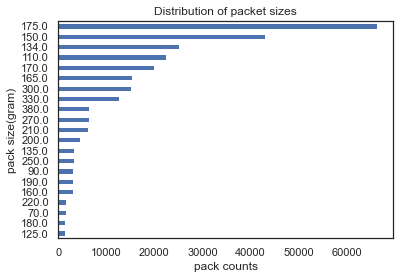

In [43]:
# Packet sizes frequently bought by customers
clean_data['PACK_SIZE'].value_counts().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('pack counts')
plt.ylabel('pack size(gram)')
plt.title('Distribution of packet sizes')
plt.savefig('productpacksize.png')

The pack_size mostly bought by the customers was 175.0g followed by 150.0g.

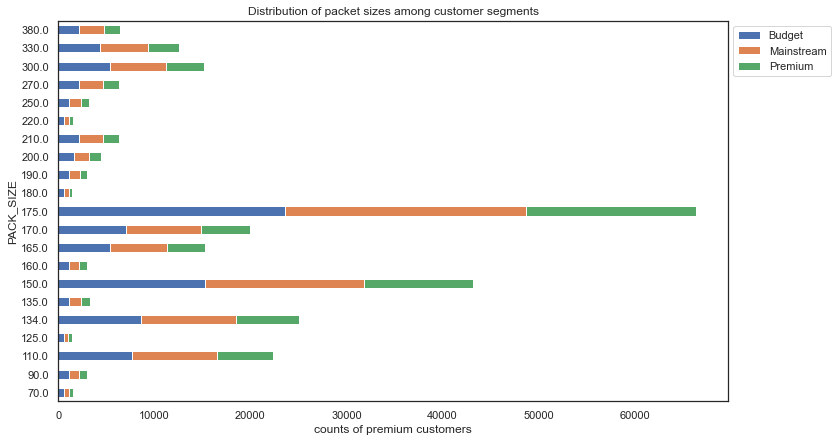

In [44]:
grouped_pack = clean_data.groupby(['PACK_SIZE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().unstack('PREMIUM_CUSTOMER')
#percentages = grouped_pack.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
grouped_pack.plot(kind='barh', stacked=True,figsize = (12,7))
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label = width / total_records * 100
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(width):.1f}%' 
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('counts of premium customers')
plt.title('Distribution of packet sizes among customer segments')
plt.savefig('packsizebought.png')

- The customers that were mostly buying chips with pack_size 175.0g belong to the Mainstream and Budget categories.


In [51]:
pd.DataFrame(clean_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','PROD_BRAND','PACK_SIZE'])['TOT_SALES'].sum().sort_values(ascending = False))[:10]

,,,,TOT_SALES
LIFESTAGE,PREMIUM_CUSTOMER,PROD_BRAND,PACK_SIZE,
YOUNG SINGLES/COUPLES,Mainstream,Kettle,175.0,17863.2
OLDER FAMILIES,Budget,Kettle,175.0,16237.8
YOUNG SINGLES/COUPLES,Mainstream,Pringles,134.0,16006.2
RETIREES,Mainstream,Kettle,175.0,15411.6
YOUNG SINGLES/COUPLES,Mainstream,Kettle,150.0,15313.4
RETIREES,Mainstream,Pringles,134.0,14781.5
OLDER SINGLES/COUPLES,Budget,Kettle,175.0,14391.0
OLDER FAMILIES,Budget,Pringles,134.0,14300.5
RETIREES,Mainstream,Kettle,150.0,14145.0


In [86]:
df_brand = clean_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','PROD_BRAND','PACK_SIZE'])['PROD_NBR'].value_counts().sort_values(ascending = False)
#df_brand.loc[df_brand.LIFESTAGE == 'YOUNG SINGLES/COUPLES']

df_brand

LIFESTAGE              PREMIUM_CUSTOMER  PROD_BRAND  PACK_SIZE  PROD_NBR
YOUNG SINGLES/COUPLES  Mainstream        Tostitos    175.0      74          335
                                         Kettle      175.0      102         332
                                         Dorito      170.0      30          326
                                         Smith       380.0      14          323
                                         Kettle      150.0      108         323
                                                                           ... 
NEW FAMILIES           Premium           Sunbites    90.0       55            4
                                         Smith       175.0      69            4
                                         Natural     175.0      5             3
                                         French      175.0      29            3
                                         Woolworths  175.0      92            2
Name: PROD_NBR, Length: 2394, dtype: int64

- The Meanstream-YOUNG SINGLES/COUPLES	are more focus on the kettle of packet size 175.0g. 

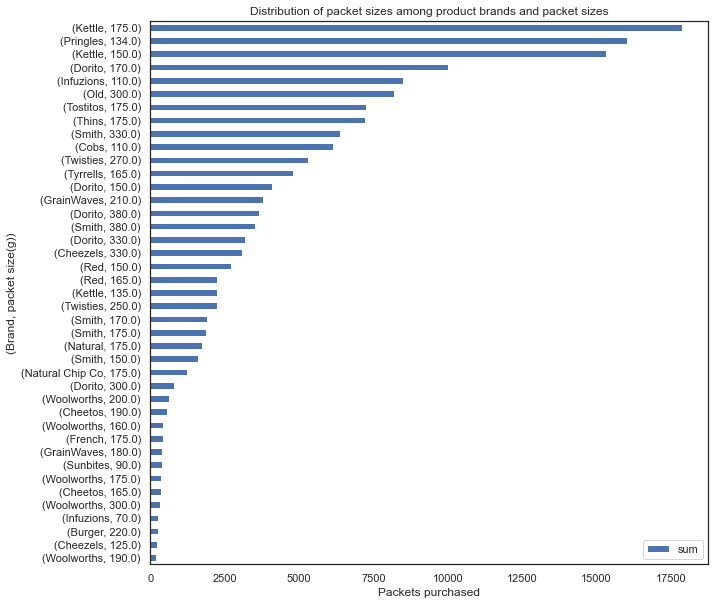

In [47]:
# Identifying brand names and their packet sizes mostly bought by customers 
young_mainstream = clean_data.loc[clean_data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
young_mainstream = young_mainstream.loc[young_mainstream['PREMIUM_CUSTOMER'] == "Mainstream"]
brand_size = young_mainstream.groupby(['PROD_BRAND','PACK_SIZE'], as_index = False)['TOT_SALES'].agg(['sum'])
ax = brand_size.sort_values(by = 'sum').plot.barh(y = "sum", figsize=(10,10))
ax.set_ylabel("(Brand, packet size(g))")
ax.set_xlabel("Packets purchased")
plt.title('Distribution of packet sizes among product brands and packet sizes')
plt.show()

- The packet size,175.0g mostly bought by customers corresponds to the product brand,Kettle.

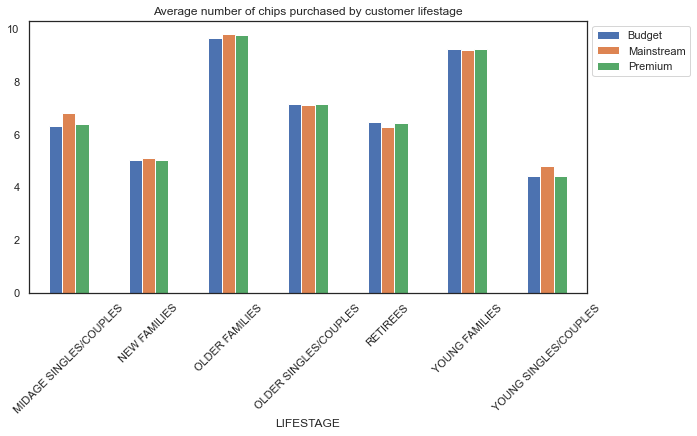

In [48]:
# A distribution of the average number of chips among
#the customers of the various life stages per segment
group1 = clean_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
group2 =  clean_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique(0)
(group1/group2).unstack('PREMIUM_CUSTOMER').fillna(0).plot.bar(stacked = False,figsize=(10, 5))
ax.set_ylabel("LIFESTAGE")
ax.set_title('A distribution of the average number of chips among the customers of the various life stages per segment')
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45)
plt.title('Average number of chips purchased by customer lifestage')
plt.show()

- It could be observed that Older Families and Young Families generally buy more chips as compared to the other life stages.

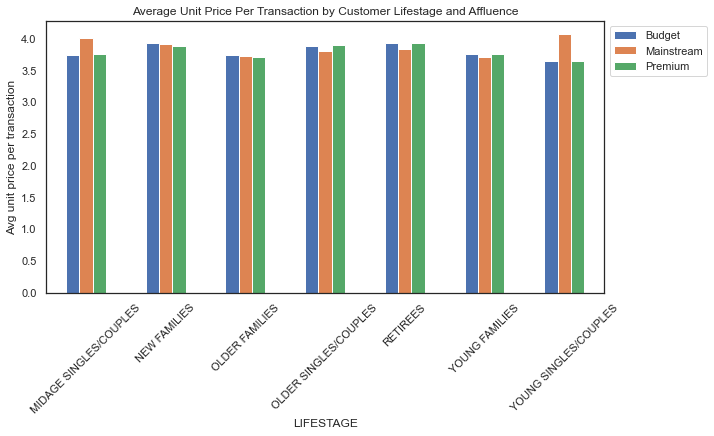

In [49]:
# Distribution of the average price of 1 chip within each segment of the various life stages
clean_data['UNIT_PRICE'] = clean_data['TOT_SALES']/clean_data['PROD_QTY']

avg_priceperunit = clean_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index = False)['UNIT_PRICE'].agg(['mean']).unstack('PREMIUM_CUSTOMER').fillna(0)
ax = avg_priceperunit['mean'].plot.bar(stacked=False, figsize=(10, 5))
ax.set_ylabel("Avg unit price per transaction")
ax.set_title('Average Unit Price Per Transaction by Customer Lifestage and Affluence')
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45)
plt.show()

- It could be observed that Mainstream-Young Singles/couples, Midage Singles/Couples are willing to pay for chips than their counterpart Budget and Premium.

### Sales drivers
- Here the sales drivers would be gotten via hypothesis testing.

#### Checking the relationship between total sales and pack_size using Pearson Correlation Test

In [ ]:
clean_data[['TOT_SALES','PACK_SIZE']].corr(method = 'pearson')

- The total sales made depends on the pack_size.
- There exist a positive correlation between total_sales and pack_size

#### Checking the type of relationship that exist between lifestage and total_sales using ANOVA Test.

In [ ]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(clean_data[clean_data['LIFESTAGE'] =='YOUNG SINGLES/COUPLES' ]['TOT_SALES'], 
                                 
                               clean_data[clean_data['LIFESTAGE'] =='YOUNG FAMILIES' ]['TOT_SALES'],
                                clean_data[clean_data['LIFESTAGE'] == 'OLDER SINGLES/COUPLES' ]['TOT_SALES'],
                                clean_data[clean_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES' ]['TOT_SALES'],
                                clean_data[clean_data['LIFESTAGE'] == 'NEW FAMILIES']['TOT_SALES'],
                                clean_data[clean_data['LIFESTAGE'] == 'OLDER FAMILIES']['TOT_SALES'],
                                clean_data[clean_data['LIFESTAGE'] == 'RETIREES']['TOT_SALES'])
print(fvalue)
print('P_value:{}'.format(pvalue))

- Since the p values is far less than 0.005,it therefore implies that the total sales of the products are dependent on LIFSTAGE of the customers.

## Conclusion

- To ensure that the variation in sales of the products continue to follow a positive trend for next half year,the campaign to be carried out should be targeting
  1. Mainstream customers segment and,
  2. Budget customer Segment, In order of importance.
- This is because from the insights obtained from analysis 38.8% and 35.0%  of the total sales are made from the Mainstream and Budget segments repectively and also because of their high purchasing frequencies.
- Within the above mentioned segments, the campaign should target the following top 3 types persons;
  1. Mainstream segment
     - Retireer
     - Young families
     - Older Singles/Couples
  2. Budget Segment
     - Older families
     - Young familes
     - Older Single/Couples
- Although the Premium segment is not the segment of interest, the campaign can also target Older Singles/Couples within the segment.
- Looking at the products, the targeted segments seems to more interest in Kettle,Smith and Dorito product brands. Therefore instead populating the stores with other brands, the stores should rather be populated with these products.
- Base on packet size,the customers in the targeted segments are more interest in products with pack sizes 175.0g and 150.g.